# 🎬 Netflix Titles Data Analysis with Python
This project is an exploratory data analysis (EDA) and visualization of the Netflix Titles dataset, using Python libraries like pandas, matplotlib, and seaborn. It focuses on uncovering trends in the types of content, countries of production, genres, and Netflix's growth over time.

In [3]:
import pandas as pd
import os
file_path = 'C:/Users/hanib/OneDrive/Desktop/netflix_titles.csv'
df = pd.read_csv(file_path)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of Titles')

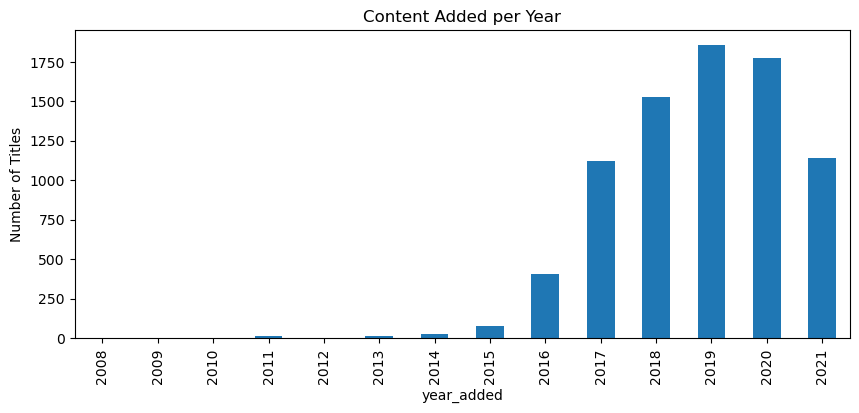

In [7]:
#Data Cleaning
df.dropna(subset=['country', 'date_added', 'rating'], inplace=True)
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
#Visualizations
# a) Total content over the years
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10, 4), title='Content Added per Year')
plt.ylabel('Number of Titles')


<Axes: title={'center': 'Movies vs TV Shows'}>

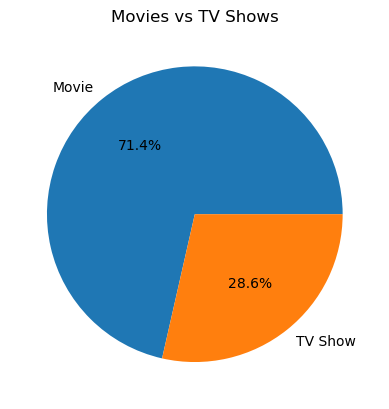

In [8]:
# b) Movies vs TV Shows
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Movies vs TV Shows', ylabel='')


<Axes: title={'center': 'Top Countries on Netflix'}, xlabel='country'>

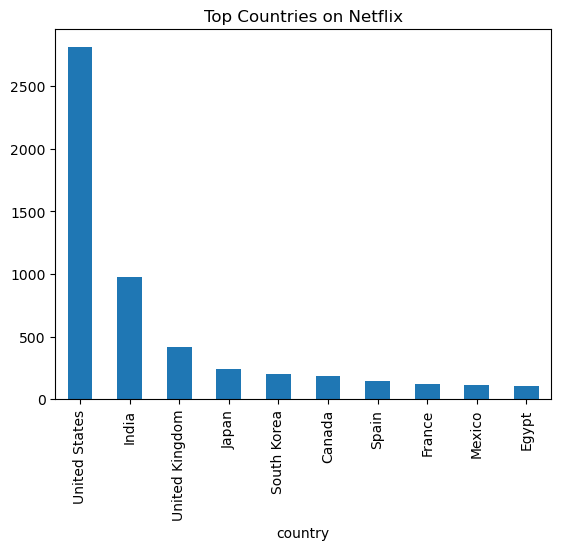

In [9]:
#c) Top 10 countries with most content
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top Countries on Netflix')


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hanib\AppData\Local\Temp\ipykernel_5960\1670166976.py:3: SyntaxWarning: invalid escape sequence '\d'
  movie_df['duration_minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)
C:\Users\hanib\AppData\Local\Temp\ipykernel_5960\1670166976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration_minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)


Text(0.5, 1.0, 'Movie Duration Distribution')

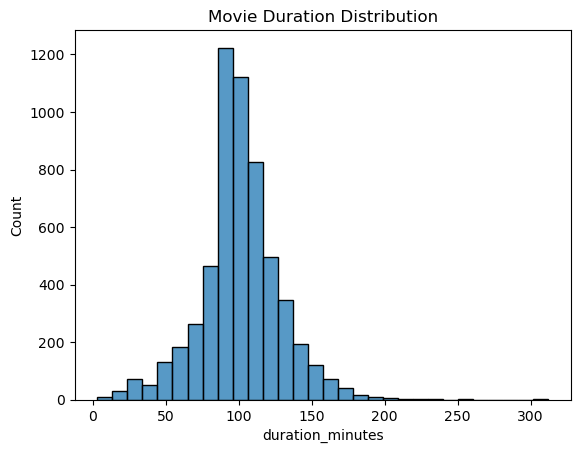

In [10]:
#d) Duration Distribution (Movies)
movie_df = df[df['type'] == 'Movie']
movie_df['duration_minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)
sns.histplot(movie_df['duration_minutes'], bins=30)
plt.title("Movie Duration Distribution")


Text(0.5, 1.0, 'Most Common Genres')

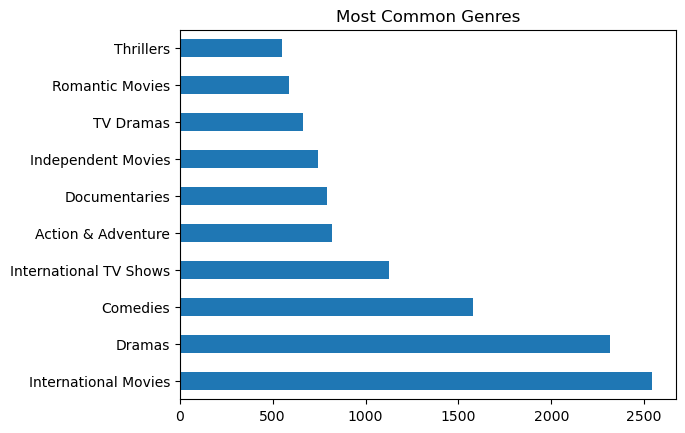

In [11]:
# e) Most Common Genres
from collections import Counter
all_genres = ','.join(df['listed_in']).split(',')
genre_counts = Counter([genre.strip() for genre in all_genres])
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Most Common Genres")


## 📁 Dataset

- **Source**: [Netflix Titles Dataset - Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)
- **Description**: Contains data about movies and TV shows available on Netflix, including title, genre, director, cast, country, release year, duration, and rating.

---

## 🛠️ Tools & Libraries Used

- Python 3.x  
- pandas  
- matplotlib  
- seaborn  
- Jupyter Notebook  

---

## 📊 Project Features

- Data Cleaning (handling missing values, formatting date columns)
- Feature Engineering (extracting year and month from dates)
- Visualization of key trends:
  - Content growth over time
  - Movies vs TV Shows ratio
  - Country-wise content production
  - Most common genres
  - Movie duration distribution

---

## 📌 Key Insights

### 📈 Netflix Content Growth
Netflix has expanded its content library significantly over the years.  
The **peak year** for content addition was **2019**, indicating strategic content growth.

### 🌍 Country Distribution
The **United States** dominates in terms of the number of titles.  
Other top contributors include **India**, **UK**, and **Japan**.

### 🎬 Content Type Popularity
**Movies** represent the majority of Netflix's content.  
**71.4%** of all titles are Movies, while TV Shows account for the rest.

### 🎞️ Genre Trends
The most frequent genre is **“International Movies”**, with **2500+ titles**.  
Other popular genres include Dramas, Comedies, and Documentaries.

---

## 📌 How to Run

1. Open this notebook in Jupyter or Google Colab.
2. Run each cell step by step to explore the analysis.

---

## 💡 Future Improvements

- Build a **Streamlit dashboard** for interactive exploration.
- Perform **text analysis** on descriptions using NLP.
- Use ML to **recommend content** based on genres or metadata.

---

## 📞 Contact

**Created by:** Hani Bint E Rauf 
📧 Email: hanibasit2014@gmail.com  
🔗 Fiverr: fiverr.com/@hani_2014

⭐ *If you like this project, consider starring the repo!*
